In [20]:
# Hücre 1: Amaç: Veri setini yüklemek ve ilk 5 satırı, sütun isimlerini ve genel yapısını incelemek
import pandas as pd

# 'gps_locations.csv' dosyasını yükle
df = pd.read_csv('../data/raw/gps_locations.csv')

# İlk 5 satırı göster
print("İlk 5 satır:")
print(df.head())

# Sütun isimleri ve veri tiplerini göster
print("\nSütun isimleri ve veri tipleri:")
print(df.dtypes)

# Genel bilgi (eksik değerler, toplam satır/sütun)
print("\nGenel bilgi:")
print(df.info())

İlk 5 satır:
   trip_id  driver_id  vehicle_id            timestamp   latitude   longitude  \
0        1        101        1001  2023-01-01 00:00:00  38.916143  -80.345269   
1        2        105        2002  2023-01-01 00:00:01  37.011830  -89.079516   
2        3        103        2002  2023-01-01 00:00:02  33.784009  -99.103643   
3        4        102        2002  2023-01-01 00:00:03  45.314835 -102.046210   
4        5        101        2002  2023-01-01 00:00:04  30.473386  -92.362577   

       speed  acceleration  steering_angle     heading  ...  \
0  39.484646      3.612832               6  212.555994  ...   
1   2.795422     -0.593295             -21  134.541146  ...   
2  13.842558     -0.209264              26  116.452839  ...   
3  69.121833     -0.413943               6   26.970247  ...   
4  13.061111      5.774122              -1  333.804023  ...   

   weather_conditions  road_type  traffic_condition  stop_events  \
0               Sunny      Urban              Light  

In [21]:
# Hücre 2: Veri setinin 'timestamp' sütununu datetime formatına dönüştürme
if df is not None:
    print("\n'timestamp' sütunu dönüşümden önce:")
    print(df['timestamp'].head())

    df['timestamp'] = pd.to_datetime(df['timestamp'])

    print("\n'timestamp' sütunu dönüşümden sonra:")
    print(df['timestamp'].head())

    # Veri tiplerini tekrar kontrol etme
    print("\nDönüşümden sonra sütun bilgileri:")
    df.info()


'timestamp' sütunu dönüşümden önce:
0    2023-01-01 00:00:00
1    2023-01-01 00:00:01
2    2023-01-01 00:00:02
3    2023-01-01 00:00:03
4    2023-01-01 00:00:04
Name: timestamp, dtype: object

'timestamp' sütunu dönüşümden sonra:
0   2023-01-01 00:00:00
1   2023-01-01 00:00:01
2   2023-01-01 00:00:02
3   2023-01-01 00:00:03
4   2023-01-01 00:00:04
Name: timestamp, dtype: datetime64[ns]

Dönüşümden sonra sütun bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trip_id                       120000 non-null  int64         
 1   driver_id                     120000 non-null  int64         
 2   vehicle_id                    120000 non-null  int64         
 3   timestamp                     120000 non-null  datetime64[ns]
 4   latitude                      120000 non-null  float64   


--- anomalous_event sütununun dağılımı ---
                  count  percentage
anomalous_event                    
0                107980       89.98
1                 12020       10.02


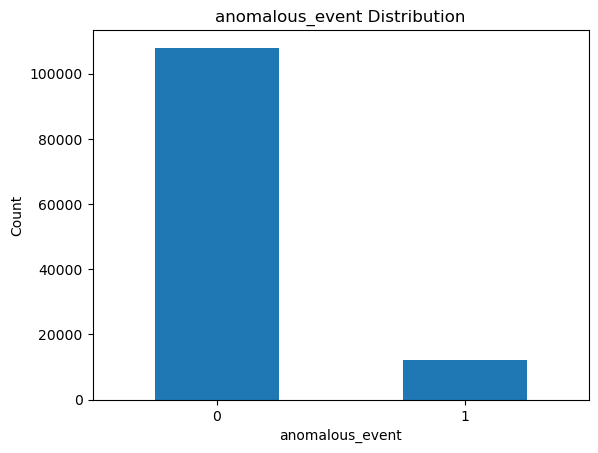


--- geofencing_violation sütununun dağılımı ---
                       count  percentage
geofencing_violation                    
0                     113971       94.98
1                       6029        5.02


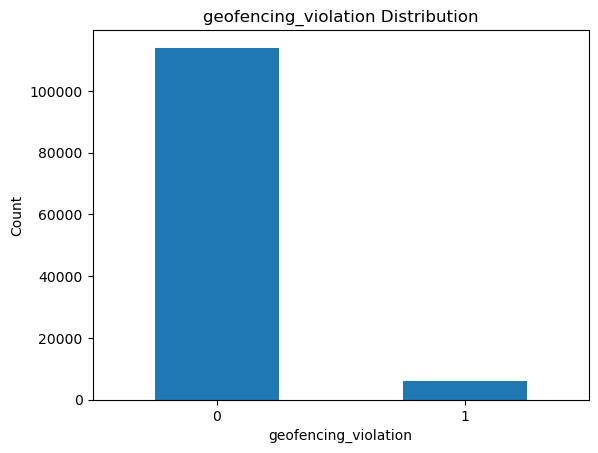

In [22]:
# ============================================================
# Hücre 3: Veri Setinde Anomali Dağılımı Kontrolü
# Bu hücrede 'anomalous_event' ve 'geofencing_violation'
# sütunlarının dağılımlarını (sayı, yüzde, eksik değer)
# tablo ve grafik olarak inceliyoruz.
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

def show_distribution(df: pd.DataFrame, column: str):
    """Verilen sütunun dağılımını tablo ve grafik olarak gösterir."""

    # Eksik değerleri de dahil ederek sayım
    counts = df[column].value_counts(dropna=False)
    percentages = df[column].value_counts(normalize=True, dropna=False) * 100

    # Sonucu DataFrame olarak düzenli göster
    dist = pd.DataFrame({
        "count": counts,
        "percentage": percentages.round(2)
    })

    print(f"\n--- {column} sütununun dağılımı ---")
    print(dist)

    # Görselleştirme
    counts.plot(
        kind="bar",
        title=f"{column} Distribution",
        rot=0
    )
    plt.ylabel("Count")
    plt.show()

# Fonksiyon çağrıları
show_distribution(df, "anomalous_event")
show_distribution(df, "geofencing_violation")


In [23]:
# Hücre 4: Amaç: Enlem, boylam ve diğer sayısal sütunlar için temel istatistikleri (ortalama, min/max, vb.) hesaplamak
print("Temel istatistikler:")
print(df.describe())

Temel istatistikler:
             trip_id      driver_id     vehicle_id  \
count  120000.000000  120000.000000  120000.000000   
mean    60000.500000     102.098875    2106.479375   
min         1.000000     101.000000    1001.000000   
25%     30000.750000     101.000000    1001.000000   
50%     60000.500000     102.000000    2002.000000   
75%     90000.250000     103.000000    3003.000000   
max    120000.000000     105.000000    5005.000000   
std     34641.160489       1.371367    1379.539988   

                           timestamp       latitude      longitude  \
count                         120000  120000.000000  120000.000000   
mean   2023-01-01 16:39:59.499999744      39.990066     -90.002296   
min              2023-01-01 00:00:00      17.930570    -133.129729   
25%    2023-01-01 08:19:59.750000128      36.623453     -96.799608   
50%       2023-01-01 16:39:59.500000      39.987503     -89.969652   
75%    2023-01-02 00:59:59.249999872      43.357958     -83.241541   
ma

In [24]:
# =================================================================
# Hücre 5: Zaman Damgası ve Konum Verilerinin Kontrolü
# Amaç: Zaman damgasının ve konum verilerinin varlığını, veri tiplerini ve aralıklarını kontrol etmek.
# =================================================================

# Gerekli kütüphaneleri içe aktarma
import pandas as pd

# Not: df dataframe'inin yüklü ve timestamp'in datetime'a dönüştürülmüş olduğunu varsayıyoruz.

# Zaman damgası (timestamp) sütununun varlığını ve veri tipini kontrol et
print("--- Zaman Damgası Kontrolü ---")
if 'timestamp' in df.columns:
    print(f"'{'timestamp'}' sütunu mevcut.")
    print(f"Veri tipi: {df['timestamp'].dtype}")

    # Zaman damgasının doğru bir şekilde datetime'a dönüştürüldüğünü doğrula
    if pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        print(f"'{'timestamp'}' sütunu doğru bir şekilde datetime formatında.")
        print(f"En erken tarih: {df['timestamp'].min()}")
        print(f"En geç tarih: {df['timestamp'].max()}")
    else:
        print(f"Hata: '{'timestamp'}' sütunu datetime formatında değil.")
else:
    print(f"Hata: '{'timestamp'}' sütunu bulunamadı!")

print("\n--- Konum (Enlem & Boylam) Kontrolü ---")
# Enlem ve boylam sütunlarının varlığını kontrol et
if all(col in df.columns for col in ['latitude', 'longitude']):
    print("Enlem ve boylam sütunları mevcut.")

    # Enlem ve boylamın coğrafi olarak mantıklı aralıkta olup olmadığını kontrol et
    # Enlem: -90 ile +90, Boylam: -180 ile +180
    lat_min, lat_max = df['latitude'].min(), df['latitude'].max()
    lon_min, lon_max = df['longitude'].min(), df['longitude'].max()

    print(f"Enlem (Latitude) Aralığı: {lat_min} - {lat_max}")
    print(f"Boylam (Longitude) Aralığı: {lon_min} - {lon_max}")

    if (-90 <= lat_min <= 90) and (-90 <= lat_max <= 90) and \
        (-180 <= lon_min <= 180) and (-180 <= lon_max <= 180):
        print("Enlem ve boylam değerleri coğrafi olarak mantıklı aralıkta görünüyor.")
    else:
        print("Uyarı: Enlem veya boylam değerleri coğrafi olarak mantıksız aralıkta olabilir.")

    # Herhangi bir 0,0 koordinatı var mı diye kontrol et
    zero_coords = df[(df['latitude'] == 0) & (df['longitude'] == 0)]
    if not zero_coords.empty:
        print(f"Uyarı: Veri setinde {len(zero_coords)} adet (0,0) koordinatına rastlandı.")
    else:
        print("Veri setinde (0,0) koordinatına rastlanmadı.")

else:
    print("Hata: 'latitude' veya 'longitude' sütunları eksik!")

--- Zaman Damgası Kontrolü ---
'timestamp' sütunu mevcut.
Veri tipi: datetime64[ns]
'timestamp' sütunu doğru bir şekilde datetime formatında.
En erken tarih: 2023-01-01 00:00:00
En geç tarih: 2023-01-02 09:19:59

--- Konum (Enlem & Boylam) Kontrolü ---
Enlem ve boylam sütunları mevcut.
Enlem (Latitude) Aralığı: 17.930570167843545 - 61.096831718895714
Boylam (Longitude) Aralığı: -133.12972918749162 - -46.981522572746016
Enlem ve boylam değerleri coğrafi olarak mantıklı aralıkta görünüyor.
Veri setinde (0,0) koordinatına rastlanmadı.


In [25]:
# =================================================================
# Hücre 6: Tüm Sütunların ve Veri Tiplerinin Eksiksiz Listesi
# Amaç: Veri setindeki tüm sütunları, veri tiplerini ve eksik değer sayılarını tam olarak görüntülemek.
# =================================================================

# Gerekli kütüphaneleri içe aktarma
import pandas as pd

# Not: df dataframe'inin yüklü olduğunu varsayıyoruz.

print("--- Veri Setindeki Tüm Sütunlar ve Bilgileri ---")

# Sütun adlarını listele
print("\nVeri setindeki tüm sütunların adları:")
print(df.columns.tolist())

print("\n--- Sütun Bilgileri (eksiksiz) ---")
# df.info() metodunu genişletilmiş formatta kullanarak tüm sütunları göster
df.info(verbose=True, show_counts=True)

--- Veri Setindeki Tüm Sütunlar ve Bilgileri ---

Veri setindeki tüm sütunların adları:
['trip_id', 'driver_id', 'vehicle_id', 'timestamp', 'latitude', 'longitude', 'speed', 'acceleration', 'steering_angle', 'heading', 'trip_duration', 'trip_distance', 'fuel_consumption', 'rpm', 'brake_usage', 'lane_deviation', 'weather_conditions', 'road_type', 'traffic_condition', 'stop_events', 'geofencing_violation', 'anomalous_event', 'route_anomaly', 'route_deviation_score', 'acceleration_variation', 'behavioral_consistency_index']

--- Sütun Bilgileri (eksiksiz) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trip_id                       120000 non-null  int64         
 1   driver_id                     120000 non-null  int64         
 2   vehicle_id                    120000 non-null  int64 

--- Etiketli Anomali Verisi Kontrolü ---

'anomalous_event' sütunu mevcut.

anomalous_event Dağılımı:
                  count  percentage
anomalous_event                    
0                107980       89.98
1                 12020       10.02


<Figure size 600x400 with 0 Axes>

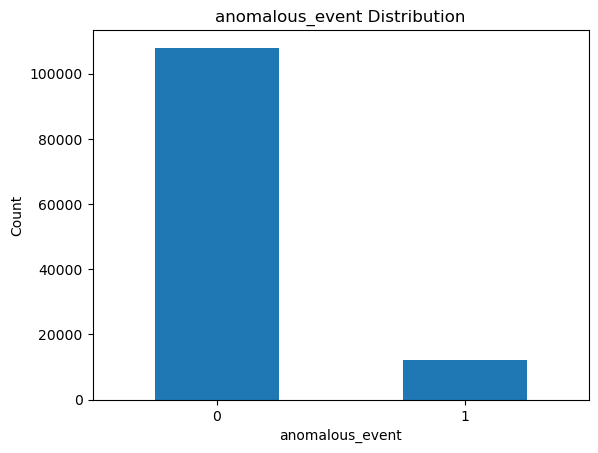


'geofencing_violation' sütunu mevcut.

geofencing_violation Dağılımı:
                       count  percentage
geofencing_violation                    
0                     113971       94.98
1                       6029        5.02


<Figure size 600x400 with 0 Axes>

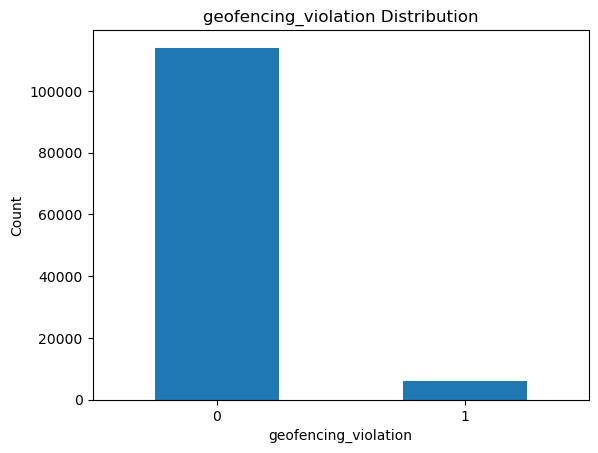


'route_anomaly' sütunu mevcut.

route_anomaly Dağılımı:
                count  percentage
route_anomaly                    
0              108035       90.03
1               11965        9.97


<Figure size 600x400 with 0 Axes>

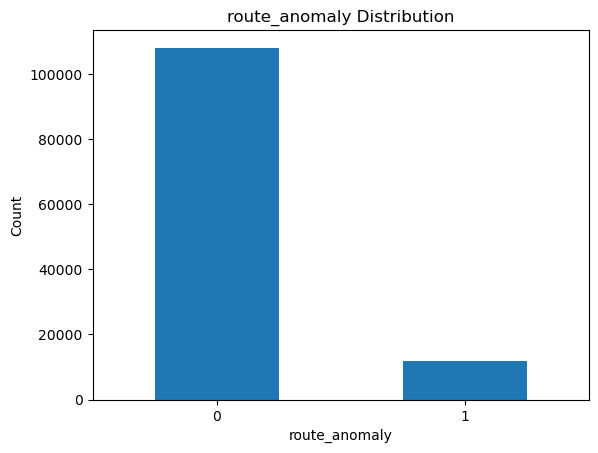

In [26]:
# =================================================================
# Hücre 7: Anomali Verisi Varlığı ve Dağılım Kontrolü
# Amaç: Veri setinde etiketlenmiş anomali verilerinin varlığını ve dağılımını kontrol etmek.
# =================================================================

print("--- Etiketli Anomali Verisi Kontrolü ---")

# Anomali etiketlerini içeren sütunları listele
anomaly_cols = ['anomalous_event', 'geofencing_violation', 'route_anomaly']

for col in anomaly_cols:
    if col in df.columns:
        print(f"\n'{col}' sütunu mevcut.")

        # Sütunun değer dağılımını ve yüzdelik oranını hesapla
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        dist_df = pd.DataFrame({
            "count": counts,
            "percentage": percentages.round(2)
        })

        print(f"\n{col} Dağılımı:")
        print(dist_df)

        # Dağılımı görselleştirme
        plt.figure(figsize=(6, 4))
        dist_df.plot(kind='bar', y='count', rot=0, legend=False)
        plt.title(f'{col} Distribution')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.show()

    else:
        print(f"\nUyarı: '{col}' sütunu bulunamadı. Anomali tespiti için dolaylı yöntemler gerekebilir.")

In [27]:
# =================================================================
# Hücre 8: Anomali Senaryolarının Çeşitliliğini Değerlendirme
# Amaç: Anomali olan ve normal olan verilerin temel istatistiklerini karşılaştırarak
# anomali senaryolarının özelliklerini anlamak.
# =================================================================

import numpy as np
import pandas as pd

labels = ["anomalous_event", "geofencing_violation", "route_anomaly"]
features = ["speed", "acceleration", "steering_angle", "latitude", "longitude", "lat", "lon"]

def _to_float64_array(s: pd.Series) -> np.ndarray:
    """Seriyi güvenli biçimde float64 NumPy dizisine çevirir."""
    a = pd.to_numeric(s, errors="coerce").to_numpy()
    return np.asarray(a, dtype=np.float64)

def cohen_d(x: pd.Series, y: pd.Series) -> float:
    """Cohen's d etki büyüklüğü (NumPy float64 ile, Pylance uyarısız)."""
    xa = _to_float64_array(x)
    ya = _to_float64_array(y)
    xa = xa[~np.isnan(xa)]
    ya = ya[~np.isnan(ya)]
    if xa.size < 2 or ya.size < 2:
        return float("nan")

    nx, ny = xa.size, ya.size
    sx2 = xa.var(ddof=1)
    sy2 = ya.var(ddof=1)
    denom = nx + ny - 2
    if denom <= 0:
        return float("nan")

    sp = np.sqrt(((nx - 1) * sx2 + (ny - 1) * sy2) / denom)
    if sp == 0 or np.isnan(sp):
        return float("nan")

    return float((xa.mean() - ya.mean()) / sp)

def _stats(s: pd.Series):
    """Dağılım istatistikleri (mean/median/std/p25/p75/min/max)."""
    a = _to_float64_array(s)
    a = a[~np.isnan(a)]
    if a.size == 0:
        return dict(n=0, mean=np.nan, std=np.nan, median=np.nan,
                    p25=np.nan, p75=np.nan, vmin=np.nan, vmax=np.nan)
    return dict(
        n=int(a.size),
        mean=float(a.mean()),
        std=float(a.std(ddof=1)) if a.size > 1 else 0.0,
        median=float(np.median(a)),
        p25=float(np.percentile(a, 25)),
        p75=float(np.percentile(a, 75)),
        vmin=float(a.min()),
        vmax=float(a.max()),
    )

for col in [c for c in labels if c in df.columns]:
    sub = df[df[col].isin([0, 1])]
    numeric_cols = sub.select_dtypes(include=[np.number]).columns
    use_feats = [f for f in features if f in numeric_cols and f != col] or \
                [c for c in numeric_cols if c != col]

    n = len(sub)
    n1 = int((sub[col] == 1).sum())
    n0 = int((sub[col] == 0).sum())
    pos_pct = (n1 / n * 100) if n else 0.0

    print("\n" + "=" * 70)
    print(f"{col} | Toplam={n}  Anomali={n1} ({pos_pct:.2f}%)  Normal={n0}")
    if n and pos_pct < 5:
        print("Class imbalance ihtimali (%5 altı).")

    rows = []
    for f in use_feats:
        x = sub.loc[sub[col] == 1, f]
        y = sub.loc[sub[col] == 0, f]

        sx = _stats(x)
        sy = _stats(y)
        delta = (sx["mean"] - sy["mean"]) if (not np.isnan(sx["mean"]) and not np.isnan(sy["mean"])) else np.nan
        d = cohen_d(x, y)

        rows.append({
            "feature": f,
            "n_pos": sx["n"], "n_neg": sy["n"],
            "mean_pos": sx["mean"], "mean_neg": sy["mean"],
            "median_pos": sx["median"], "median_neg": sy["median"],
            "std_pos": sx["std"], "std_neg": sy["std"],
            "p25_pos": sx["p25"], "p25_neg": sy["p25"],
            "p75_pos": sx["p75"], "p75_neg": sy["p75"],
            "min_pos": sx["vmin"], "min_neg": sy["vmin"],
            "max_pos": sx["vmax"], "max_neg": sy["vmax"],
            "delta_mean": delta,
            "cohens_d": d,
            "iqr_pos": (sx["p75"] - sx["p25"]) if (not np.isnan(sx["p75"]) and not np.isnan(sx["p25"])) else np.nan,
            "iqr_neg": (sy["p75"] - sy["p25"]) if (not np.isnan(sy["p75"]) and not np.isnan(sy["p25"])) else np.nan,
        })

    out = pd.DataFrame(rows).set_index("feature")
    num_cols = out.select_dtypes(include=[np.number]).columns
    out[num_cols] = out[num_cols].round(3)
    out = out.sort_values(by="cohens_d", key=lambda s: s.abs(), ascending=False)

    try:
        display(out)
    except NameError:
        print(out)



anomalous_event | Toplam=120000  Anomali=12020 (10.02%)  Normal=107980


,n_pos,n_neg,mean_pos,mean_neg,median_pos,median_neg,std_pos,std_neg,p25_pos,p25_neg,p75_pos,p75_neg,min_pos,min_neg,max_pos,max_neg,delta_mean,cohens_d,iqr_pos,iqr_neg
feature,,,,,,,,,,,,,,,,,,,,
steering_angle,12020,107980,0.456,0.041,1.000,0.000,14.952,14.861,-10.000,-10.000,11.000,10.000,-45.000,-45.000,45.000,45.000,0.416,0.028,21.000,20.000
speed,12020,107980,30.241,29.942,20.915,20.608,30.278,30.205,8.786,8.594,42.305,41.322,0.003,0.000,332.392,365.764,0.299,0.010,33.520,32.728
latitude,12020,107980,40.017,39.987,39.999,39.986,5.038,4.999,36.563,36.630,43.418,43.349,19.982,17.931,58.064,61.097,0.030,0.006,6.855,6.720
longitude,12020,107980,-89.961,-90.007,-89.938,-89.974,10.025,10.026,-96.727,-96.810,-83.331,-83.232,-130.045,-133.130,-51.737,-46.982,0.045,0.005,13.396,13.578
acceleration,12020,107980,1.005,1.004,0.382,0.389,2.025,1.995,-0.423,-0.418,1.764,1.779,-1.000,-1.000,17.938,22.033,0.002,0.001,2.186,2.198



geofencing_violation | Toplam=120000  Anomali=6029 (5.02%)  Normal=113971


,n_pos,n_neg,mean_pos,mean_neg,median_pos,median_neg,std_pos,std_neg,p25_pos,p25_neg,p75_pos,p75_neg,min_pos,min_neg,max_pos,max_neg,delta_mean,cohens_d,iqr_pos,iqr_neg
feature,,,,,,,,,,,,,,,,,,,,
speed,6029,113971,30.264,29.957,20.950,20.625,30.550,30.194,8.537,8.618,42.017,41.409,0.013,0.000,305.929,365.764,0.307,0.010,33.481,32.791
latitude,6029,113971,39.942,39.993,39.907,39.990,5.020,5.002,36.528,36.630,43.345,43.359,21.169,17.931,57.339,61.097,-0.050,-0.010,6.817,6.730
longitude,6029,113971,-90.069,-89.999,-89.968,-89.970,10.011,10.027,-96.972,-96.789,-83.251,-83.241,-126.278,-133.130,-53.186,-46.982,-0.071,-0.007,13.721,13.548
steering_angle,6029,113971,0.141,0.079,0.000,0.000,14.657,14.881,-10.000,-10.000,10.000,10.000,-45.000,-45.000,45.000,45.000,0.061,0.004,20.000,20.000
acceleration,6029,113971,1.007,1.004,0.399,0.388,1.995,1.999,-0.422,-0.419,1.770,1.778,-1.000,-1.000,15.920,22.033,0.003,0.001,2.192,2.197



route_anomaly | Toplam=120000  Anomali=11965 (9.97%)  Normal=108035


,n_pos,n_neg,mean_pos,mean_neg,median_pos,median_neg,std_pos,std_neg,p25_pos,p25_neg,p75_pos,p75_neg,min_pos,min_neg,max_pos,max_neg,delta_mean,cohens_d,iqr_pos,iqr_neg
feature,,,,,,,,,,,,,,,,,,,,
steering_angle,11965,108035,-0.154,0.109,0.000,0.000,14.876,14.869,-10.000,-10.000,10.000,10.000,-45.000,-45.000,45.000,45.000,-0.263,-0.018,20.000,20.000
longitude,11965,108035,-89.947,-90.008,-89.950,-89.971,10.068,10.021,-96.827,-96.794,-83.073,-83.257,-127.936,-133.130,-51.737,-46.982,0.062,0.006,13.753,13.536
speed,11965,108035,30.063,29.962,20.632,20.634,30.097,30.225,8.608,8.617,41.862,41.385,0.002,0.000,291.455,365.764,0.101,0.003,33.253,32.768
acceleration,11965,108035,1.002,1.004,0.389,0.389,2.006,1.997,-0.413,-0.420,1.752,1.781,-1.000,-1.000,18.135,22.033,-0.002,-0.001,2.165,2.200
latitude,11965,108035,39.985,39.991,39.972,39.989,4.999,5.003,36.586,36.629,43.389,43.352,20.580,17.931,58.385,61.097,-0.006,-0.001,6.803,6.723


--- Zaman Serisi ve Konum Verisi İçsel Tutarlılık Kontrolü ---
Zaman farkı istatistikleri (saniye):
count    119999.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: time_diff, dtype: float64
Uyarı: 1 adet zaman farkı eksik!

Konum farkı istatistikleri (metre):
count    1.199990e+05
mean     1.262702e+06
std      6.941197e+05
min      4.847772e+03
25%      7.431753e+05
50%      1.164683e+06
75%      1.675696e+06
max      5.335941e+06
Name: distance_diff, dtype: float64
Uyarı: 5335.94 km'lik büyük konum sıçraması tespit edildi!


--- Kategorik Veri Dağılım Kontrolü ---

'weather_conditions' sütunu mevcut.

weather_conditions Dağılımı:
                    count  percentage
weather_conditions                   
Sunny               84070       70.06
Foggy               12042       10.04
Rainy               11972        9.98
Cloudy              11916        9.93


<Figure size 800x500 with 0 Axes>

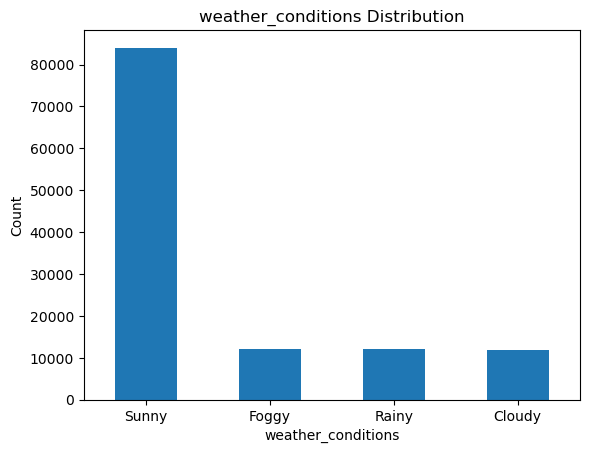


'road_type' sütunu mevcut.

road_type Dağılımı:
           count  percentage
road_type                   
Urban      72120       60.10
Rural      23980       19.98
Highway    23900       19.92


<Figure size 800x500 with 0 Axes>

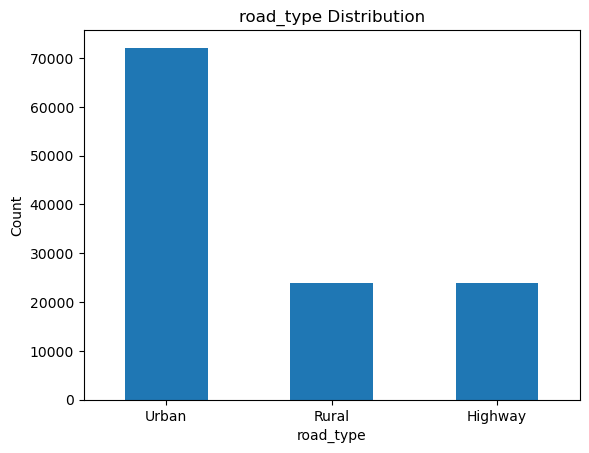


'traffic_condition' sütunu mevcut.

traffic_condition Dağılımı:
                   count  percentage
traffic_condition                   
Moderate           59957       49.96
Light              35834       29.86
Heavy              24209       20.17


<Figure size 800x500 with 0 Axes>

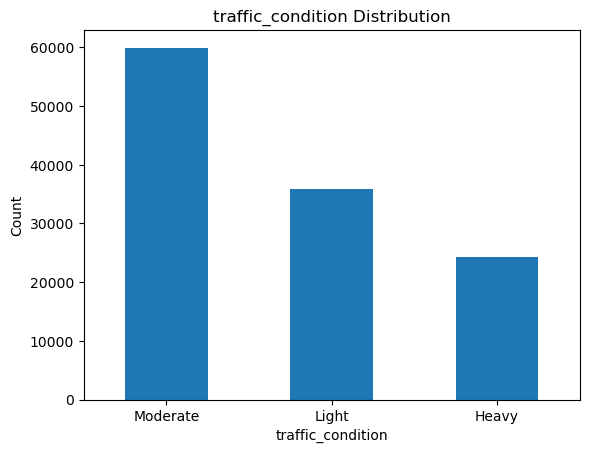

In [28]:
# =================================================================
# Hücre 9: Gerçeklik ve Tutarlılık Kontrolü (Hibrit)
# Amaç: Zaman serisi ve konum verilerinin içsel tutarlılığını ve
# kategorik verilerin dağılımını kontrol etmek.
# =================================================================

# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine, Unit # haversine kütüphanesinin yüklü olduğunu varsayıyoruz

print("--- Zaman Serisi ve Konum Verisi İçsel Tutarlılık Kontrolü ---")

# Zaman serisi tutarlılığı
if 'timestamp' in df.columns:
    # Zaman farkını saniye cinsinden hesapla
    df['time_diff'] = df['timestamp'].diff().dt.total_seconds()
    print("Zaman farkı istatistikleri (saniye):")
    print(df['time_diff'].describe())

    if df['time_diff'].min() < 0:
        print("Uyarı: Negatif zaman farkı tespit edildi, veri sırası bozuk olabilir!")
    if df['time_diff'].isna().sum() > 0:
        print(f"Uyarı: {df['time_diff'].isna().sum()} adet zaman farkı eksik!")
else:
    print("Zaman serisi tutarlılığı kontrolü için 'timestamp' sütunu bulunamadı.")


# Konum tutarlılığı (sıçramalar)
# Haversine fonksiyonu ile iki nokta arasındaki mesafeyi hesaplayan yardımcı fonksiyon
def calculate_haversine_distance(row):
    prev_lat = row['latitude_prev']
    prev_lon = row['longitude_prev']
    current_lat = row['latitude']
    current_lon = row['longitude']

    if pd.notna(prev_lat) and pd.notna(prev_lon):
        return haversine((prev_lat, prev_lon), (current_lat, current_lon), unit=Unit.METERS)
    return np.nan

if all(col in df.columns for col in ['latitude', 'longitude']):
    # Bir önceki satırdaki konum verilerini yeni sütunlara kaydır
    df['latitude_prev'] = df['latitude'].shift(1)
    df['longitude_prev'] = df['longitude'].shift(1)

    # Konum farkını hesapla
    df['distance_diff'] = df.apply(calculate_haversine_distance, axis=1)

    print("\nKonum farkı istatistikleri (metre):")
    print(df['distance_diff'].describe())

    # Çok büyük sıçramaları tespit et
    max_jump = df['distance_diff'].max()
    if max_jump > 5000:  # Örnek: 5 km'den fazla sıçrama
        print(f"Uyarı: {round(max_jump/1000, 2)} km'lik büyük konum sıçraması tespit edildi!")
        # İhtiyaç halinde, bu sıçramanın olduğu satırları gözlemle
        # print("Büyük sıçramanın olduğu satırlar:")
        # print(df.loc[df['distance_diff'] > 5000])

    # Geçici sütunları temizle
    df.drop(['latitude_prev', 'longitude_prev'], axis=1, inplace=True)
else:
    print("\nKonum tutarlılığı kontrolü için 'latitude' veya 'longitude' sütunları eksik!")

print("\n\n--- Kategorik Veri Dağılım Kontrolü ---")

# Kategorik sütunları listele
categorical_cols = ['weather_conditions', 'road_type', 'traffic_condition']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n'{col}' sütunu mevcut.")

        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        dist_df = pd.DataFrame({
            "count": counts,
            "percentage": percentages.round(2)
        })

        print(f"\n{col} Dağılımı:")
        print(dist_df)

        plt.figure(figsize=(8, 5))
        dist_df.plot(kind='bar', y='count', rot=0, legend=False)
        plt.title(f'{col} Distribution')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.show()

    else:
        print(f"\nUyarı: '{col}' sütunu bulunamadı.")

In [29]:
# =================================================================
# Hücre 10: Hız/İvme Outlier Analizi ve Araç Bazlı Yoğunlaşma
# Amaç:
#  - speed ve acceleration için robust outlier tespiti (MAD, gerekirse IQR)
#  - outlier oranlarını raporlama ve "nadir mi?" sorusunu cevaplama
#  - outlier'ların belirli araçlarda (vehicle_id) kümelenip kümelenmediğini inceleme
#  - opsiyonel: varsa 'speed_gps_ms' kolonunu da analiz etme (Hücre 9'dan gelebilir)
# Not: df'in yüklü olduğu varsayılır.
# =================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------- Parametreler -----------------------
ID_CANDIDATES = ["vehicle_id", "driver_id", "trip_id"]  # hangisi varsa onu kullan
TARGET_COLS = ["speed", "acceleration"]  # analiz edilecek ana kolonlar
OPTIONAL_COLS = ["speed_gps_ms"]         # varsa ayrıca analiz edilir
MAD_Z_THRESH = 3.5                        # robust z-score eşiği
IQR_K = 1.5                               # IQR çarpanı (fallback)
TOP_K = 10                                # en çok outlier üreten ilk K araç
RARE_PCT = 1.0                            # "nadir" eşiği (%, ör. <1%)
# ------------------------------------------------------------

def _to_float_array(s: pd.Series) -> np.ndarray:
    a = pd.to_numeric(s, errors="coerce").to_numpy()
    return np.asarray(a, dtype=np.float64)

def robust_outlier_flags(s: pd.Series,
                          mad_z: float = MAD_Z_THRESH,
                          iqr_k: float = IQR_K) -> tuple[pd.Series, dict]:
    """MAD ile iki yönlü outlier bayrağı; MAD=0 ise IQR fallback."""
    x = pd.to_numeric(s, errors="coerce")
    med = x.median()
    mad = (x - med).abs().median()

    stats = {"median": float(med) if pd.notna(med) else np.nan,
              "mad": float(mad) if pd.notna(mad) else np.nan,
              "method": "MAD"}

    if pd.notna(mad) and mad > 0:
        z = 0.6745 * (x - med) / mad
        flags = z.abs() > mad_z
        return flags.fillna(False), stats

    # MAD işe yaramadıysa IQR'a düş
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    stats.update({"q1": float(q1) if pd.notna(q1) else np.nan,
                  "q3": float(q3) if pd.notna(q3) else np.nan,
                  "iqr": float(iqr) if pd.notna(iqr) else np.nan,
                  "method": "IQR"})
    if pd.notna(iqr) and iqr > 0:
        lower = q1 - iqr_k * iqr
        upper = q3 + iqr_k * iqr
        flags = (x < lower) | (x > upper)
        return flags.fillna(False), stats

    # Tamamen sabit kolon vb. durum
    return pd.Series(False, index=s.index), stats

# 0) Hangi ID kullanılacak?
id_col = next((c for c in ID_CANDIDATES if c in df.columns), None)

# 1) Hangi kolonlara bakılacak?
cols = [c for c in TARGET_COLS if c in df.columns]
cols += [c for c in OPTIONAL_COLS if c in df.columns]  # varsa ekle

if not cols:
    print("Analiz için 'speed' veya 'acceleration' bulunamadı.")
else:
    print("Analiz edilen kolonlar:", ", ".join(cols))
    if id_col:
        print("Yoğunlaşma analizi için ID:", id_col)

    df_out = df.copy()
    summaries = []

    # 2) Kolon bazında outlier tespiti ve özet
    for c in cols:
        flags, stats = robust_outlier_flags(df_out[c])
        out_col = f"{c}_outlier"
        df_out[out_col] = flags

        n = int(df_out.shape[0])
        k = int(flags.sum())
        pct = 100.0 * k / n if n else 0.0

        print("\n" + "-" * 64)
        print(f"{c} için outlier özeti")
        print(f"Yöntem: {stats['method']}  |  median={stats.get('median', np.nan)}  "
              f"mad={stats.get('mad', np.nan)}  "
              f"q1={stats.get('q1', np.nan)}  q3={stats.get('q3', np.nan)}")
        print(f"Outlier sayısı: {k} / {n}  (%{pct:.3f})")

        if pct < RARE_PCT:
            print(f"Not: {c} outlier oranı %{pct:.3f} ile oldukça nadir.")
        summaries.append({"metric": c, "n": n, "outliers": k, "pct": pct})

    # 3) Araç bazında (veya mevcut ID bazında) yoğunlaşma
    if id_col:
        # Araç başına kayıt sayısı ve outlier sayıları
        grp = df_out.groupby(id_col, dropna=False)
        per_id = pd.DataFrame(index=grp.size().index)
        per_id["records"] = grp.size()

        for c in cols:
            oc = f"{c}_outlier"
            per_id[f"{c}_outliers"] = grp[oc].sum()
            per_id[f"{c}_rate"] = per_id[f"{c}_outliers"] / per_id["records"]

        # Herhangi bir outlier var mı?
        any_mask_cols = [f"{c}_outlier" for c in cols]
        df_out["_any_outlier"] = df_out[any_mask_cols].any(axis=1)
        per_id["any_outliers"] = grp["_any_outlier"].sum()
        per_id["any_rate"] = per_id["any_outliers"] / per_id["records"]

        # Sıralı tablo
        per_id = per_id.sort_values("any_rate", ascending=False)
        print("\n" + "=" * 64)
        print(f"Outlier yoğunlaşması (ilk {TOP_K} {id_col}):")
        print(per_id.head(TOP_K).round(4))

        # Konsantrasyon göstergesi: ilk K aracın tüm outlier'lardaki payı
        total_any = int(df_out["_any_outlier"].sum())
        top_any = int(per_id.head(TOP_K)["any_outliers"].sum())
        share = 100.0 * top_any / total_any if total_any else 0.0
        print(f"\nKonsantrasyon: İlk {TOP_K} {id_col}, tüm outlier'ların %{share:.2f} kadarını üretiyor.")

        # 4) Basit grafikler (ayrı figür, seaborn yok)
        try:
            top_idx = per_id.head(TOP_K).index.astype(str)
            plt.figure()
            per_id.loc[top_idx, "any_outliers"].plot(kind="bar", rot=0, title=f"Top {TOP_K} {id_col} by ANY outliers")
            plt.ylabel("Outlier count")
            plt.xlabel(id_col)
            plt.tight_layout()
            plt.show()

            for c in cols:
                plt.figure()
                per_id.loc[top_idx, f"{c}_outliers"].plot(kind="bar", rot=0, title=f"Top {TOP_K} {id_col} by {c} outliers")
                plt.ylabel("Outlier count")
                plt.xlabel(id_col)
                plt.tight_layout()
                plt.show()
        except Exception as e:
            print(f"Görselleştirme esnasında uyarı: {e}")

    # 5) Özet tabloyu göster
    summary_df = pd.DataFrame(summaries).set_index("metric").round(3)
    print("\n" + "-" * 64)
    print("Genel outlier özeti (% oranlar):")
    print(summary_df)


Analiz edilen kolonlar: speed, acceleration
Yoğunlaşma analizi için ID: vehicle_id

----------------------------------------------------------------
speed için outlier özeti
Yöntem: MAD  |  median=20.633107133140594  mad=14.32593576736517  q1=nan  q3=nan
Outlier sayısı: 5194 / 120000  (%4.328)

----------------------------------------------------------------
acceleration için outlier özeti
Yöntem: MAD  |  median=0.3886388424578334  mad=0.9629100021747579  q1=nan  q3=nan
Outlier sayısı: 4921 / 120000  (%4.101)

Outlier yoğunlaşması (ilk 10 vehicle_id):
            records  speed_outliers  speed_rate  acceleration_outliers  \
vehicle_id                                                               
3003          12053             543      0.0451                    489   
1001          59929            2587      0.0432                   2516   
4004          11980             534      0.0446                    489   
5005          12147             511      0.0421                    498  

<Figure size 640x480 with 0 Axes>

In [30]:
# =================================================================
# Hücre 11: GPS Türevi Tutarlılık ve Anomali Özeti
# === Tek Hücre: EDA + Veri Seti Uygunluğu (1–6 maddeler) ===
# Amaç:
#  - (1) Etiket dağılımı ve anomalili araç sayısı (nunique)
#  - (2) GPS türevi hızdan fiziksel olmayan sıçramalar (gps_jump) EDA
#  - (3) Toplam araç sayısı ve (4) anomalili araç sayısı
#  - (5) "Hız-ivme birincil / GPS destekleyici" kararına temel metrikler
#  - (6) Araç bazında anomali ve gps_jump oran tablosu + problemli örnekler
# Gereken sütunlar (esnek isim eşleme): vehicle_id/device_id, timestamp, lat/lon
# =================================================================

import numpy as np
import pandas as pd

# ----------------------- Parametreler -----------------------
PHYS_SPEED_KMH = 300.0   # fiziksel hız eşiği
SHORT_DT_S = 2           # kısa zaman aralığı (s) -> bu aralıkta aşırı hız varsa sıçrama say

# ----------------------- Yardımcılar -----------------------
def pick_col(frame, options):
    for name in options:
        if name in frame.columns:
            return name
    return None

def haversine_m(lat1, lon1, lat2, lon2):
    R = 6371000.0  # metre
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlmb = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlmb / 2.0) ** 2
    return 2.0 * R * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))

def p95(series):
    s = series.dropna()
    if len(s) == 0:
        return np.nan
    return float(np.percentile(s, 95))

# ----------------------- Çekirdek Analiz -----------------------
# 1) Sütunları bul
veh_col = pick_col(df, ["vehicle_id", "device_id", "vehicleId", "car_id"])
ts_col = pick_col(df, ["timestamp", "time", "datetime", "ts"])
lat_col = pick_col(df, ["lat", "latitude", "Latitude", "LAT"])
lon_col = pick_col(df, ["lon", "longitude", "Longitude", "LON"])

missing = []
if veh_col is None:
    missing.append("vehicle_id/device_id")
if ts_col is None:
    missing.append("timestamp")
if lat_col is None:
    missing.append("lat")
if lon_col is None:
    missing.append("lon")
if missing:
    raise KeyError(f"Gerekli sütun(lar) eksik: {missing}")

# 2) Temizlik ve temel tip dönüşümleri
df11 = df.copy()
df11[veh_col] = df11[veh_col].astype(str)
df11[ts_col] = pd.to_datetime(df11[ts_col], errors="coerce")
df11[lat_col] = pd.to_numeric(df11[lat_col], errors="coerce")
df11[lon_col] = pd.to_numeric(df11[lon_col], errors="coerce")

if "anomalous_event" not in df11.columns:
    df11["anomalous_event"] = 0
df11["anomalous_event"] = (
    pd.to_numeric(df11["anomalous_event"], errors="coerce")
      .fillna(0)
      .clip(0, 1)
      .astype(int)
)

sort_cols = [c for c in [veh_col, ts_col] if c is not None]
df11 = df11.sort_values(sort_cols).reset_index(drop=True)


# 3) GPS türevleri (mesafe / süre / hız)
assert veh_col is not None and ts_col is not None and lat_col is not None and lon_col is not None
g = df11.groupby(veh_col, sort=False)

prev_lat = g[lat_col].shift(1)
prev_lon = g[lon_col].shift(1)
prev_ts  = g[ts_col].shift(1)


df11["_dist_m"] = haversine_m(prev_lat, prev_lon, df11[lat_col], df11[lon_col])
dt_sec = (df11[ts_col] - prev_ts).dt.total_seconds()
df11["_dt_s"] = np.where(prev_ts.notna(), np.maximum(dt_sec, 0.0), np.nan)
df11["_calc_speed_kmh"] = np.where(
    df11["_dt_s"] > 0,
    (df11["_dist_m"] / df11["_dt_s"]) * 3.6,
    np.nan
)

# 4) Fiziksel olmayan sıçrama -> gps_jump
df11["gps_jump"] = (
    ((df11["_dt_s"] <= SHORT_DT_S) & (df11["_calc_speed_kmh"] > PHYS_SPEED_KMH))
    | (df11["_calc_speed_kmh"] > 1000.0)
    | (df11["_dist_m"] > 200000.0)
).astype(int)

# 5) Toplam metrikler (1,3,4,5)
total_rows = int(len(df11))
vehicles_total = int(df11[veh_col].nunique())
vehicles_with_anomaly = int(df11.loc[df11["anomalous_event"] == 1, veh_col].nunique())
anomaly_rows_total = int(df11["anomalous_event"].sum())
anomaly_rate = float(anomaly_rows_total / total_rows) if total_rows else np.nan
over_phys = int((df11["_calc_speed_kmh"] > PHYS_SPEED_KMH).sum())
over_1000 = int((df11["_calc_speed_kmh"] > 1000.0).sum())
gpsj_total = int(df11["gps_jump"].sum())
gpsj_rate = float(gpsj_total / total_rows) if total_rows else np.nan

# 6) Araç bazında özet tablo (6)
agg = g.agg(
    total_rows=(veh_col, "size"),
    anomaly_rows=("anomalous_event", "sum"),
    gps_jump_rows=("gps_jump", "sum"),
    dt_median_s=("_dt_s", "median"),
    gps_speed_p95_kmh=("_calc_speed_kmh", p95),
).reset_index()

agg["anomaly_rate"] = np.where(
    agg["total_rows"] > 0,
    agg["anomaly_rows"] / agg["total_rows"],
    np.nan
)
agg["gps_jump_rate"] = np.where(
    agg["total_rows"] > 0,
    agg["gps_jump_rows"] / agg["total_rows"],
    np.nan
)

# 7) ÇIKTILAR
print("=== EDA & Veri Seti Uygunluğu (Hücre 11) ===")
print(f"Kayıt sayısı: {total_rows:,}")
print(f"Toplam araç sayısı: {vehicles_total}")
print(f"Toplam anomali satırı: {anomaly_rows_total:,} (oran: {anomaly_rate:.2%})")
print(f"Anomali içeren araç sayısı (nunique): {vehicles_with_anomaly}")
print(f"GPS aşırı hız (≥{PHYS_SPEED_KMH:.0f} km/h): {over_phys}  |  >1000 km/h: {over_1000}")
print(f"gps_jump toplam: {gpsj_total} (oran: {gpsj_rate:.2%})")

cols = [
    veh_col,
    "total_rows",
    "anomaly_rows",
    "anomaly_rate",
    "gps_jump_rows",
    "gps_jump_rate",
    "dt_median_s",
    "gps_speed_p95_kmh",
]
print("\n--- Araç Bazında Özet (tamamı) ---")
print(agg[cols].sort_values(["anomaly_rate", "gps_jump_rate"], ascending=False).to_string(index=False))

bad_examples = (
    df11.loc[df11["gps_jump"] == 1, [veh_col, ts_col, lat_col, lon_col, "_dist_m", "_dt_s", "_calc_speed_kmh"]]
    .sort_values("_calc_speed_kmh", ascending=False)
    .head(10)
    .reset_index(drop=True)
)
print("\n--- GPS Sıçrama Örnekleri (ilk 10) ---")
print(bad_examples.to_string(index=False))
# =================================================================


=== EDA & Veri Seti Uygunluğu (Hücre 11) ===
Kayıt sayısı: 120,000
Toplam araç sayısı: 5
Toplam anomali satırı: 12,020 (oran: 10.02%)
Anomali içeren araç sayısı (nunique): 5
GPS aşırı hız (≥300 km/h): 119995  |  >1000 km/h: 119995
gps_jump toplam: 119995 (oran: 100.00%)

--- Araç Bazında Özet (tamamı) ---
vehicle_id  total_rows  anomaly_rows  anomaly_rate  gps_jump_rows  gps_jump_rate  dt_median_s  gps_speed_p95_kmh
      2002       23891          2433      0.101838          23890       0.999958          4.0       6.100651e+06
      5005       12147          1218      0.100272          12146       0.999918          7.0       4.578584e+06
      1001       59929          5987      0.099902          59928       0.999983          1.0       7.967728e+06
      4004       11980          1188      0.099165          11979       0.999917          7.0       4.573145e+06
      3003       12053          1194      0.099062          12052       0.999917          7.0       4.423227e+06

--- GPS Sıçram

=== GPS Uygunluk Kontrolü ===

Hız istatistikleri (km/h):
count    1.199950e+05
mean     2.288942e+06
std      2.277365e+06
min      1.019878e+03
50%      1.488860e+06
90%      5.569585e+06
99%      9.925708e+06
max      1.867273e+07
Name: _calc_speed_kmh, dtype: float64
> 50 km/h: 119,995 satır
> 100 km/h: 119,995 satır
> 300 km/h: 119,995 satır
> 500 km/h: 119,995 satır
> 1000 km/h: 119,995 satır
> 5000 km/h: 119,985 satır

Araç bazında GPS Jump oranları (%):
vehicle_id
1001    100.00
2002    100.00
3003     99.99
4004     99.99
5005     99.99
Name: gps_jump, dtype: float64


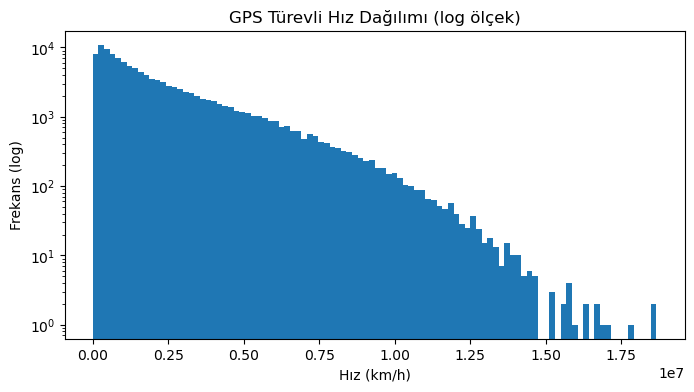


Örnek ‘absürt’ hız satırları (> 1000 km/h):
   vehicle_id           timestamp   latitude  longitude  _calc_speed_kmh
1        1001 2023-01-01 00:00:05  46.670788 -96.459125     1.128717e+06
2        1001 2023-01-01 00:00:09  42.731518 -79.850442     1.242631e+06
3        1001 2023-01-01 00:00:11  33.698258 -91.952262     2.619937e+06
4        1001 2023-01-01 00:00:12  38.690047 -93.071695     2.030629e+06
5        1001 2023-01-01 00:00:14  39.429301 -82.352844     1.671433e+06
6        1001 2023-01-01 00:00:16  44.057224 -86.734911     1.133746e+06
7        1001 2023-01-01 00:00:17  35.932757 -78.735744     4.069321e+06
8        1001 2023-01-01 00:00:19  41.432166 -82.890276     1.277457e+06
9        1001 2023-01-01 00:00:20  53.258714 -93.186123     5.483967e+06
10       1001 2023-01-01 00:00:23  47.137124 -84.973326     1.075326e+06


In [31]:
# =================================================================
# 12) GPS Uygunluk Analizi (hız sıçramaları, dağılım, anormallikler)
# Amaç: Enlem-boylam verilerinden Haversine formülü ile ardışık noktalar arasındaki mesafeyi hesaplayarak
# hız türetmek. Bu hız değerlerini mevcut "speed" sütunu ile karşılaştırmak.
# Ayrıca anormal konum sıçramaları (çok yüksek hızlar) tespit edilerek verinin mekânsal bütünlüğü kontrol edilir.
# =================================================================


import matplotlib.pyplot as plt

print("=== GPS Uygunluk Kontrolü ===")

# 1) Hız dağılımı (calc_speed_kmh)
print("\nHız istatistikleri (km/h):")
print(df11["_calc_speed_kmh"].describe(percentiles=[0.5, 0.9, 0.99]))

# 2) Uç hızları say
thr_list = [50, 100, 300, 500, 1000, 5000]
for thr in thr_list:
    cnt = (df11["_calc_speed_kmh"] > thr).sum()
    print(f"> {thr} km/h: {cnt:,} satır")

# 3) Araç başına gps_jump oranı
jump_stats = df11.groupby(veh_col)["gps_jump"].mean().mul(100).round(2)
print("\nAraç bazında GPS Jump oranları (%):")
print(jump_stats)

# 4) Görselleştirme: hız dağılımı (log ölçek)
plt.figure(figsize=(8,4))
df11["_calc_speed_kmh"].plot(kind="hist", bins=100, log=True)
plt.xlabel("Hız (km/h)")
plt.ylabel("Frekans (log)")
plt.title("GPS Türevli Hız Dağılımı (log ölçek)")
plt.show()

# 5) Örnek satırlar: absürt hızlar
print("\nÖrnek ‘absürt’ hız satırları (> 1000 km/h):")
print(df11.loc[df11["_calc_speed_kmh"] > 1000,
                [veh_col, ts_col, lat_col, lon_col, "_calc_speed_kmh"]].head(10))


In [32]:
# =================================================================
# 13) Veri Seti Genel Uygunluk Özeti (EDA)
# Amaç: 12. hücredeki temel EDA’nın devamı olarak özellikle konum (latitude/longitude) sütunlarının
# geçerliliğini, araç/şoför bazlı dağılımların dengeliliğini ve mekânsal uygunluğu kontrol etmek.
# Böylece veri setinin sadece zamansal değil mekânsal bütünlüğü de doğrulanmış olur.
# =================================================================

print("=== Veri Seti Genel Uygunluk Özeti ===")

# 1. Veri şekli ve kolon bilgileri
print("\n--- Boyutlar ---")
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")

print("\n--- Sütun Tipleri ---")
print(df.dtypes)

# 2. Eksik değer kontrolü
print("\n--- Eksik Değer Oranları ---")
print((df.isna().sum() / len(df) * 100).round(2))

# 3. Sayısal sütunların temel istatistikleri
print("\n--- Sayısal Sütun İstatistikleri ---")
print(df.describe().T)

# 4. Kategorik sütunların dağılımı
if "vehicle_id" in df.columns:
    print("\n--- Vehicle ID Dağılımı ---")
    print(df["vehicle_id"].value_counts(normalize=True).round(4) * 100)

if "driver_id" in df.columns:
    print("\n--- Driver ID Dağılımı ---")
    print(df["driver_id"].value_counts(normalize=True).round(4) * 100)

# 5. Zaman damgası kontrolü
time_col = None
for c in df.columns:
    if "time" in c.lower():
        time_col = c
        break

if time_col:
    print("\n--- Zaman Aralığı ---")
    print(f"Min: {df[time_col].min()}")
    print(f"Max: {df[time_col].max()}")


=== Veri Seti Genel Uygunluk Özeti ===

--- Boyutlar ---
Satır sayısı: 120000
Sütun sayısı: 28

--- Sütun Tipleri ---
trip_id                                  int64
driver_id                                int64
vehicle_id                               int64
timestamp                       datetime64[ns]
latitude                               float64
longitude                              float64
speed                                  float64
acceleration                           float64
steering_angle                           int64
heading                                float64
trip_duration                          float64
trip_distance                          float64
fuel_consumption                       float64
rpm                                    float64
brake_usage                              int64
lane_deviation                         float64
weather_conditions                      object
road_type                               object
traffic_condition                   

=== Konum (Latitude / Longitude) Uygunluk Kontrolü ===
Toplam satır: 120,000
Geçersiz LAT sayısı: 0
Geçersiz LON sayısı: 0
(0,0) koordinat sayısı: 0

Araç bazında koordinat kayıt sayıları:
            latitude  longitude
vehicle_id                     
1001           59929      59929
2002           23891      23891
3003           12053      12053
4004           11980      11980
5005           12147      12147


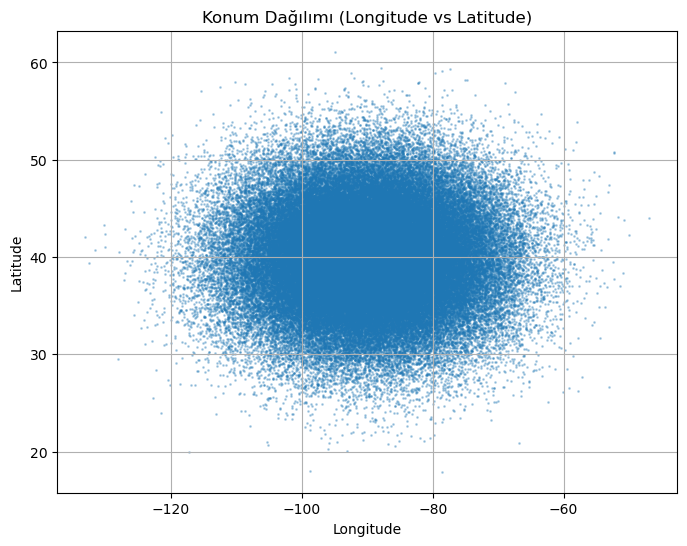


 Tüm konum değerleri aralık içinde, sorun görünmüyor.


In [33]:
# =================================================================
# 14) Konum (Lat/Lon) Uygunluk Analizi (range check, dağılım, anomaliler)
# Amaç: Latitude/Longitude değerlerinin geçerli aralıkta olup olmadığını,
#       (0,0) gibi absürt koordinatlar içerip içermediğini kontrol etmek
#       ve dağılımı görselleştirmek.
# =================================================================

import matplotlib.pyplot as plt

print("=== Konum (Latitude / Longitude) Uygunluk Kontrolü ===")

lat_col = "latitude"
lon_col = "longitude"

# Range check
invalid_lat = df[(df[lat_col] < -90) | (df[lat_col] > 90)]
invalid_lon = df[(df[lon_col] < -180) | (df[lon_col] > 180)]
zero_coords = df[(df[lat_col] == 0) & (df[lon_col] == 0)]

print(f"Toplam satır: {len(df):,}")
print(f"Geçersiz LAT sayısı: {len(invalid_lat):,}")
print(f"Geçersiz LON sayısı: {len(invalid_lon):,}")
print(f"(0,0) koordinat sayısı: {len(zero_coords):,}")

# Araç bazında koordinat sayısı
vehicle_dist = df.groupby("vehicle_id")[[lat_col, lon_col]].count()
print("\nAraç bazında koordinat kayıt sayıları:")
print(vehicle_dist)

# Harita üzerinde kaba dağılım (örnek scatter)
plt.figure(figsize=(8, 6))
plt.scatter(df[lon_col], df[lat_col], s=1, alpha=0.3)
plt.title("Konum Dağılımı (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Outlier örneklerini göster
if len(invalid_lat) > 0 or len(invalid_lon) > 0 or len(zero_coords) > 0:
    print("\n Örnek 'absürt' konum satırları:")
    display(pd.concat([invalid_lat.head(3), invalid_lon.head(3), zero_coords.head(3)]))
else:
    print("\n Tüm konum değerleri aralık içinde, sorun görünmüyor.")


In [34]:
# =================================================================
# 15) Anomali-Korelasyon Analizi (EDA)
# Amaç:
#   - Farklı anomali türlerinin (anomalous_event, route_anomaly, geofencing_violation)
#     ve ilgili sayısal sinyallerin (speed, acceleration, vb.) ilişkisini ölçmek.
#   - Eş-görünme oranları (P(B=1|A=1)), Lift ve Jaccard ile birlikte yorumlamak.
# Not:
#   - Yalnızca mevcut sütunlar kullanılır; yeni kolon üretilmez, dosyaya yazılmaz.
# =================================================================

import numpy as np
import pandas as pd

# ----------------------- 0) Hangi sütunlar var? -----------------------
candidate_anomaly_cols = [
    "anomalous_event", "route_anomaly", "geofencing_violation"
]
candidate_numeric_cols = [
    "speed","acceleration","steering_angle","heading",
    "route_deviation_score","acceleration_variation","behavioral_consistency_index"
]

anomaly_cols = [c for c in candidate_anomaly_cols if c in df.columns]
numeric_cols = [c for c in candidate_numeric_cols if c in df.columns]

print("=== Anomali-Korelasyon Analizi ===")
print(f"Bulunan anomali sütunları: {anomaly_cols}")
print(f"İncelenecek sayısal sütunlar: {numeric_cols}")

if len(anomaly_cols) < 1:
    raise RuntimeError("Analiz için en az bir anomali sütunu gerekli (örn. anomalous_event).")

# ----------------------- 1) Korelasyon Matrisi -----------------------
# Anomali kolonlarını 0/1'e döndürüp sayısallarla birlikte korelasyon oluşturuyoruz.
corr_df = df.copy()

for c in anomaly_cols:
    corr_df[c] = pd.to_numeric(corr_df[c], errors="coerce").fillna(0).clip(0,1).astype(float)

num_for_corr = numeric_cols + anomaly_cols
num_for_corr = [c for c in num_for_corr if c in corr_df.columns]

if len(num_for_corr) >= 2:
    corr_mat = corr_df[num_for_corr].corr(method="pearson")
    print("\n--- Korelasyon Matrisi (Pearson) ---")
    print(corr_mat.round(3))
else:
    print("\n(Not) Korelasyon matrisi için en az iki sayısal/sıfır-bir sütun gerekir.")

# ----------------------- 2) Anomali Çiftleri: Ko-olasılık, Lift, Jaccard -----------------------
def _pair_stats(A, B, frame):
    # A ve B: binary sütun adları
    a = pd.to_numeric(frame[A], errors="coerce").fillna(0).clip(0,1)
    b = pd.to_numeric(frame[B], errors="coerce").fillna(0).clip(0,1)

    n = len(frame)
    a1 = a.sum()
    b1 = b.sum()
    ab1 = ((a==1) & (b==1)).sum()

    pA = a1 / n if n else np.nan
    pB = b1 / n if n else np.nan
    pB_given_A = ab1 / a1 if a1 > 0 else np.nan
    jaccard = ab1 / ((a1 + b1 - ab1) if (a1 + b1 - ab1) > 0 else np.nan)
    lift = (pB_given_A / pB) if (pB and not np.isnan(pB_given_A)) else np.nan

    return {
        "count(A=1)": int(a1),
        "count(B=1)": int(b1),
        "count(A=1,B=1)": int(ab1),
        "P(B=1|A=1)": round(pB_given_A*100, 2) if not np.isnan(pB_given_A) else np.nan,
        "P(A=1)": round(pA*100, 2) if not np.isnan(pA) else np.nan,
        "P(B=1)": round(pB*100, 2) if not np.isnan(pB) else np.nan,
        "Lift(A->B)": round(lift, 3) if not np.isnan(lift) else np.nan,
        "Jaccard(A,B)": round(jaccard, 3) if not np.isnan(jaccard) else np.nan,
    }

pair_rows = []
for i in range(len(anomaly_cols)):
    for j in range(i+1, len(anomaly_cols)):
        A, B = anomaly_cols[i], anomaly_cols[j]
        stats_ab = _pair_stats(A, B, df)
        stats_ba = _pair_stats(B, A, df)

        # A->B ve B->A yönlerini ayrı tutuyoruz (conditional değişir)
        row_ab = {"A": A, "B": B}
        row_ab.update(stats_ab)
        pair_rows.append(row_ab)

        row_ba = {"A": B, "B": A}
        row_ba.update(stats_ba)
        pair_rows.append(row_ba)

if pair_rows:
    pair_table = pd.DataFrame(pair_rows, columns=[
        "A","B","count(A=1)","count(B=1)","count(A=1,B=1)",
        "P(B=1|A=1)","P(A=1)","P(B=1)","Lift(A->B)","Jaccard(A,B)"
    ])
    print("\n--- Anomali Çiftleri: Ko-olasılık / Lift / Jaccard ---")
    print(pair_table.to_string(index=False))
else:
    print("\n(Not) İkili anomali analizi için en az iki anomali sütunu gerekir.")

# ----------------------- 3) Basit Çapraz Tablolar (opsiyonel özet) -----------------------
for col in anomaly_cols:
    vc = pd.to_numeric(df[col], errors="coerce").fillna(0).clip(0,1)
    rate = vc.mean()*100 if len(vc)>0 else np.nan
    print(f"\n{col} -> Pozitif oranı: {rate:.2f}%  |  Pozitif sayısı: {int(vc.sum())}")


=== Anomali-Korelasyon Analizi ===
Bulunan anomali sütunları: ['anomalous_event', 'route_anomaly', 'geofencing_violation']
İncelenecek sayısal sütunlar: ['speed', 'acceleration', 'steering_angle', 'heading', 'route_deviation_score', 'acceleration_variation', 'behavioral_consistency_index']

--- Korelasyon Matrisi (Pearson) ---
                              speed  acceleration  steering_angle  heading  \
speed                         1.000         0.000          -0.001   -0.006   
acceleration                  0.000         1.000          -0.001    0.006   
steering_angle               -0.001        -0.001           1.000   -0.001   
heading                      -0.006         0.006          -0.001    1.000   
route_deviation_score        -0.001         0.002           0.002    0.001   
acceleration_variation        0.003        -0.003          -0.001   -0.004   
behavioral_consistency_index -0.004         0.002           0.003   -0.005   
anomalous_event               0.003         0.0

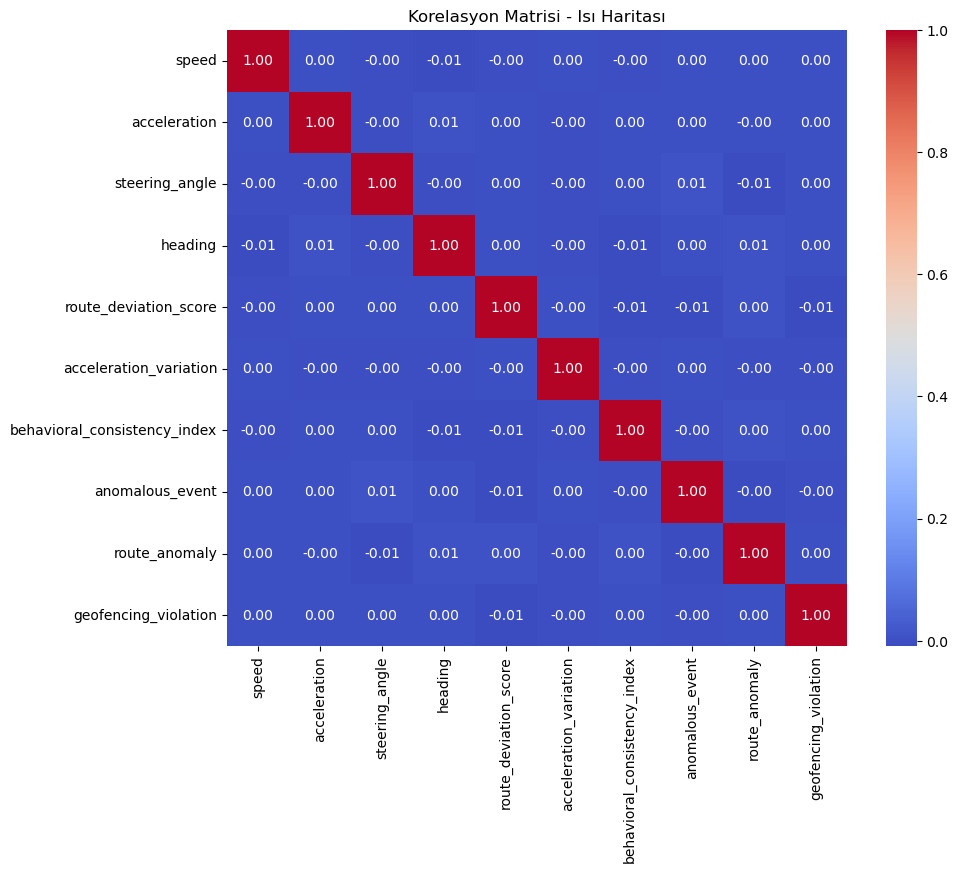

In [35]:
# Hücre 15 - Korelasyon Isı Haritası (Heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

# Anomali ve sayısal sütunlar için korelasyon matrisi
corr = df[["speed", "acceleration", "steering_angle", "heading",
            "route_deviation_score", "acceleration_variation",
            "behavioral_consistency_index",
            "anomalous_event", "route_anomaly", "geofencing_violation"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi - Isı Haritası")
plt.show()


--- Trip Bazlı Özet ---

--- En Kısa ve En Uzun 5 Yolculuk (Toplam Süreye Göre) ---
         row_count       min_timestamp       max_timestamp  \
trip_id                                                      
1                1 2023-01-01 00:00:00 2023-01-01 00:00:00   
80008            1 2023-01-01 22:13:27 2023-01-01 22:13:27   
80007            1 2023-01-01 22:13:26 2023-01-01 22:13:26   
80006            1 2023-01-01 22:13:25 2023-01-01 22:13:25   
80005            1 2023-01-01 22:13:24 2023-01-01 22:13:24   

         total_duration_minutes  total_distance_km  \
trip_id                                              
1                    250.980424          24.868334   
80008               7328.185208          45.788999   
80007                763.973827          72.253639   
80006               7613.238215           7.369188   
80005               3553.945501          41.060107   

         calculated_duration_seconds  
trip_id                               
1                       

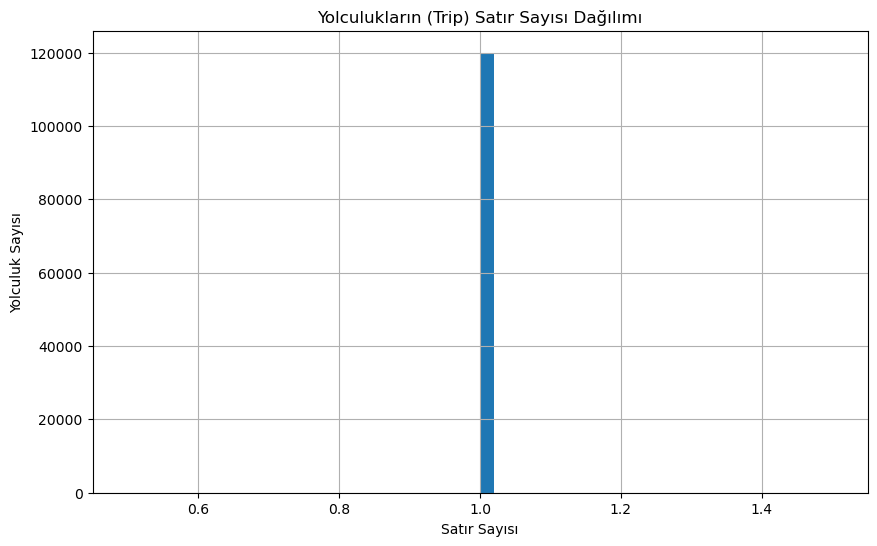

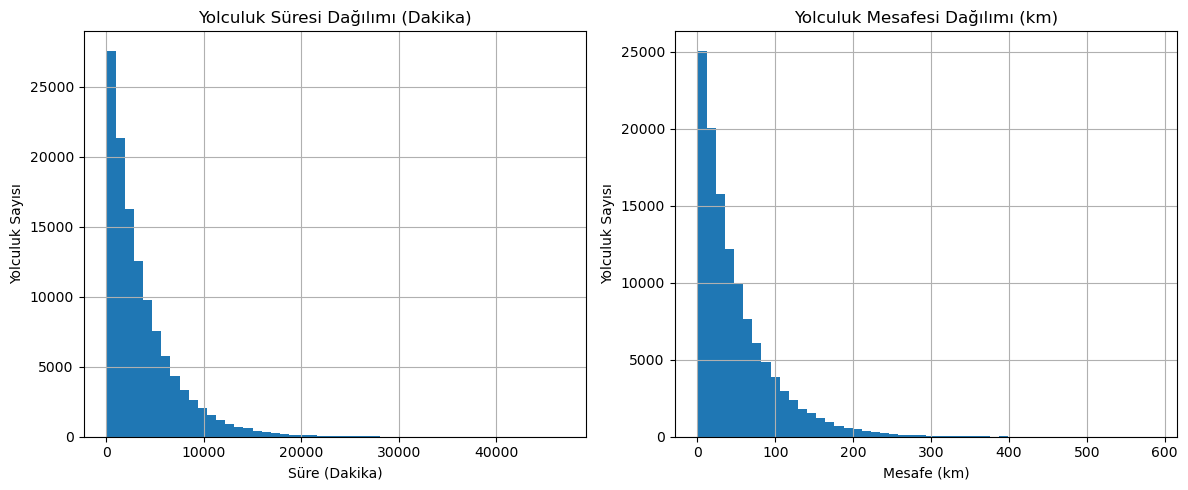


--- Analiz Özeti ---
Toplam yolculuk sayısı: 120000
Ortalama yolculuk süresi: 3593.51 dakika
Ortalama yolculuk mesafesi: 49.92 km
Satır sayısı 10'dan az olan yolculuk oranı: 100.00%


In [36]:
# =================================================================
# 16) Trip Süreleri & Mesafeleri (EDA)
# Amaç: trip_id bazında toplam süre (dk) ve mesafe (km) dağılımını görmek,
#       çok kısa/uzun yolculukları işaretlemek.
# =================================================================

print("--- Trip Bazlı Özet ---")

# Her bir trip_id için toplam satır sayısını, minimum ve maksimum zaman damgasını hesaplayalım
# Bu, yolculukların başlangıç/bitiş zamanını ve veri yoğunluğunu anlamamızı sağlar.
trip_summary = df.groupby('trip_id').agg(
    row_count=('trip_id', 'size'),
    min_timestamp=('timestamp', 'min'),
    max_timestamp=('timestamp', 'max'),
    total_duration_minutes=('trip_duration', 'max'),
    total_distance_km=('trip_distance', 'max')
)

# min_timestamp ve max_timestamp farkını hesaplayarak trip süresini doğrula
trip_summary['calculated_duration_seconds'] = (pd.to_datetime(trip_summary['max_timestamp']) - pd.to_datetime(trip_summary['min_timestamp'])).dt.total_seconds()

# En kısa ve en uzun 5 yolculuğu görüntüle
print("\n--- En Kısa ve En Uzun 5 Yolculuk (Toplam Süreye Göre) ---")
print(trip_summary.sort_values(by='calculated_duration_seconds', ascending=True).head())
print(trip_summary.sort_values(by='calculated_duration_seconds', ascending=False).head())

print("\n--- Satır Sayısına Göre Anormal Yolculuklar ---")
# Anormal derecede az satırdan oluşan yolculukları bulalım (örn: 10 satırdan az)
short_trips = trip_summary[trip_summary['row_count'] < 10].sort_values(by='row_count', ascending=True)
print(f"\n{len(short_trips)} adet 10 satırdan kısa yolculuk tespit edildi.")
print(short_trips.head())

# Satır sayılarının dağılımını histogram ile görselleştir
plt.figure(figsize=(10, 6))
trip_summary['row_count'].hist(bins=50)
plt.title('Yolculukların (Trip) Satır Sayısı Dağılımı')
plt.xlabel('Satır Sayısı')
plt.ylabel('Yolculuk Sayısı')
plt.show()

# trip_duration ve trip_distance sütunlarının dağılımlarını görselleştir
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
trip_summary['total_duration_minutes'].hist(bins=50)
plt.title('Yolculuk Süresi Dağılımı (Dakika)')
plt.xlabel('Süre (Dakika)')
plt.ylabel('Yolculuk Sayısı')

plt.subplot(1, 2, 2)
trip_summary['total_distance_km'].hist(bins=50)
plt.title('Yolculuk Mesafesi Dağılımı (km)')
plt.xlabel('Mesafe (km)')
plt.ylabel('Yolculuk Sayısı')
plt.tight_layout()
plt.show()

print("\n--- Analiz Özeti ---")
print(f"Toplam yolculuk sayısı: {len(trip_summary)}")
print(f"Ortalama yolculuk süresi: {trip_summary['total_duration_minutes'].mean():.2f} dakika")
print(f"Ortalama yolculuk mesafesi: {trip_summary['total_distance_km'].mean():.2f} km")
print(f"Satır sayısı 10'dan az olan yolculuk oranı: {(len(short_trips) / len(trip_summary)) * 100:.2f}%")

In [37]:
# =================================================================
# 17) Trip Bazlı GPS Jump Dağılımı (EDA)
# Amaç: trip_id bazında gps_jump sayısı/oranı ve tek-satırlı trip tespiti
# Not: df'e yazmadan geçici hesaplar yapar (timestamp/mesafe/sürat)
# =================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Gerekli kolonlar
req = ["trip_id", "timestamp", "latitude", "longitude"]
missing = [c for c in req if c not in df.columns]
if missing:
    raise KeyError(f"Gerekli sütun(lar) eksik: {missing}")

# ---- Geçici çerçeve
tmp = df[req].copy()
tmp["ts"]  = pd.to_datetime(tmp["timestamp"], errors="coerce")
tmp["lat"] = pd.to_numeric(tmp["latitude"], errors="coerce")
tmp["lon"] = pd.to_numeric(tmp["longitude"], errors="coerce")

# ---- Trip içinde kronolojik sırala + ardışık farklar
tmp = tmp.sort_values(["trip_id", "ts"], kind="mergesort").reset_index(drop=True)
tmp["prev_lat"] = tmp.groupby("trip_id")["lat"].shift(1)
tmp["prev_lon"] = tmp.groupby("trip_id")["lon"].shift(1)
tmp["prev_ts"]  = tmp.groupby("trip_id")["ts"].shift(1)

# ---- Haversine (metre) - vektörize
def haversine_m(lat1, lon1, lat2, lon2):
    R = 6_371_000.0
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi  = np.radians(lat2 - lat1)
    dlmb  = np.radians(lon2 - lon1)
    a = np.sin(dphi/2.0)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlmb/2.0)**2
    return 2.0 * R * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))

tmp["_dist_m"] = haversine_m(tmp["prev_lat"], tmp["prev_lon"], tmp["lat"], tmp["lon"])
tmp["_dt_s"]   = (tmp["ts"] - tmp["prev_ts"]).dt.total_seconds()

# ---- Türetilmiş hız (km/h) ve gps_jump (yalnızca geçici)
speed_kmh = np.where(tmp["_dt_s"] > 0, (tmp["_dist_m"] / tmp["_dt_s"]) * 3.6, np.nan)
SHORT_DT_S = 2
PHYS_KMH   = 300.0
gps_jump = (
    ((tmp["_dt_s"] <= SHORT_DT_S) & (speed_kmh > PHYS_KMH)) |
    (speed_kmh > 1000.0) |
    (tmp["_dist_m"] > 200_000.0)
).astype(int)

tmp["_gps_jump"] = gps_jump

# ---- Trip bazında özetler
counts = tmp.groupby("trip_id", sort=False).size().rename("row_count")
multi_mask = counts >= 2
single_trips = (~multi_mask).sum()
total_trips = len(counts)

summary = (
    tmp.loc[multi_mask.reindex(tmp["trip_id"]).to_numpy()]
      .groupby("trip_id", sort=False)
      .agg(
          rows=("trip_id", "size"),
          jump_count=("_gps_jump", "sum"),
          jump_rate=("_gps_jump", lambda s: s.mean()*100.0),
          dt_median_s=("_dt_s", "median")
      )
      .reset_index()
)

print("=== Trip Bazlı GPS Jump Dağılımı ===")
print(f"Toplam trip sayısı: {total_trips:,}")
print(f"Tek satırlı trip sayısı: {single_trips:,} "
      f"(oran: {single_trips/total_trips*100:.2f}%)")

if len(summary) == 0:
    print("\nUyarı: Tüm trip'ler tek satır görünüyor. "
          "Trip segmentasyonu/oluşturma aşaması gözden geçirilmeli; "
          "gps_jump değerlendirilemedi.")
else:
    print("\n--- Trip bazında jump_rate istatistikleri (%) ---")
    print(summary["jump_rate"].describe([0.5, 0.9, 0.99]).round(2))
    print("\n--- En yüksek jump_rate (ilk 10) ---")
    print(summary.sort_values("jump_rate", ascending=False)
                  .head(10)
                  .reset_index(drop=True)
                  .round({"jump_rate": 2}))

    # Basit histogram (jump_rate %)
    plt.figure(figsize=(7,5))
    plt.hist(summary["jump_rate"], bins=40)
    plt.title("Trip Bazında GPS Jump Oranı Dağılımı (%)")
    plt.xlabel("jump_rate (%)")
    plt.ylabel("Frekans")
    plt.show()


=== Trip Bazlı GPS Jump Dağılımı ===
Toplam trip sayısı: 120,000
Tek satırlı trip sayısı: 120,000 (oran: 100.00%)

Uyarı: Tüm trip'ler tek satır görünüyor. Trip segmentasyonu/oluşturma aşaması gözden geçirilmeli; gps_jump değerlendirilemedi.


## Geleceğe Dönük Notlar

Bu bölüm, EDA sürecinde ortaya çıkan bulgular ışığında, veri mühendisliği ve model geliştirme aşamalarında dikkate alınması gereken noktaları özetlemektedir:

- **Veri Mühendisliği ve Temizleme:** En kritik bulgu olan "sahte trip_id" sorununun çözülmesi gerektiği ve bunun için timestamp ve vehicle_id gibi sütunları kullanarak mantıklı yolculuklar oluşturulacağı belirtilmeli. Ayrıca, GPS sıçramaları ve diğer aykırı değerlerin temizlenmesinin de bu aşamanın bir parçası olduğu vurgulanabilir.  

- **Model Seçimi:** Veri setindeki özellikler arasında zayıf bir doğrusal korelasyon olduğu için, anomali tespiti için doğrusal olmayan (non-linear) makine öğrenmesi algoritmalarının (örn. Isolation Forest) daha uygun olacağı not edilmeli.  

- **Ağırlıklandırma ve Çoklu Anomali Tespiti:** Farklı anomali türleri arasındaki zayıf ilişki, birleşik anomali tespiti modeline ihtiyaç olduğunu gösteriyor. Yani, bir geofencing_violation ve aynı anda bir speed_anomaly'nin daha ciddi bir anomali olarak değerlendirileceği bir sistemin tasarlanabileceği belirtilebilir.  


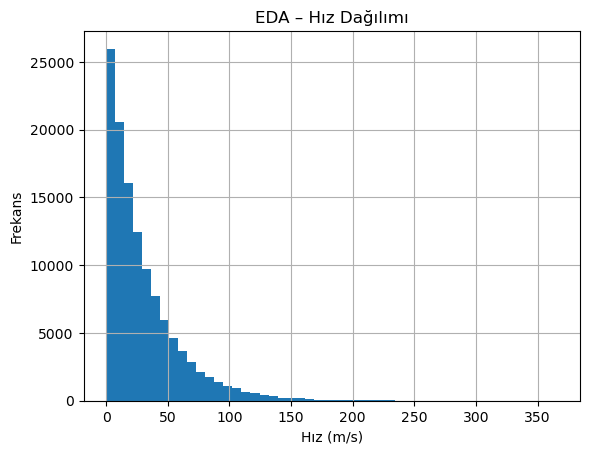

In [39]:
import matplotlib.pyplot as plt

# Örnek: hız dağılımı histogramı
df["speed"].hist(bins=50)
plt.title("EDA – Hız Dağılımı")
plt.xlabel("Hız (m/s)")
plt.ylabel("Frekans")

# Görseli kaydet
plt.savefig("eda_hiz_dagilimi.png", dpi=300, bbox_inches="tight")
plt.show()

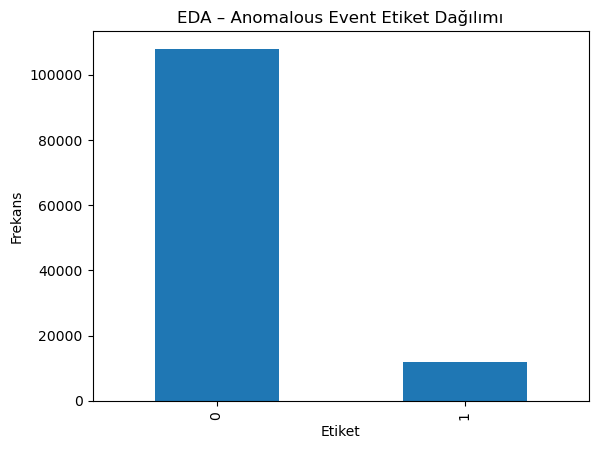

In [40]:
df["anomalous_event"].value_counts().plot(kind="bar")
plt.title("EDA – Anomalous Event Etiket Dağılımı")
plt.xlabel("Etiket")
plt.ylabel("Frekans")

# Görseli kaydet
plt.savefig("eda_anomalous_event.png", dpi=300, bbox_inches="tight")
plt.show()

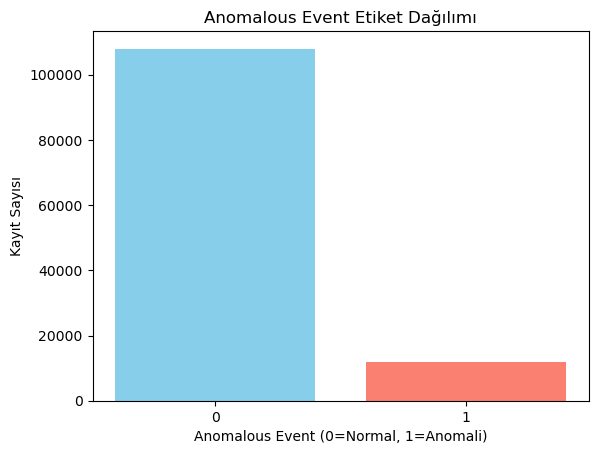

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Örnek veri (senin datasetinden gelecek şekilde ayarlayabilirsin)
data = {"anomalous_event": [0]*107976 + [1]*12024}  # %10,02 oranına yakın
df = pd.DataFrame(data)

# Bar chart
counts = df["anomalous_event"].value_counts()
plt.bar(counts.index.astype(str), counts.values, color=["skyblue", "salmon"])
plt.xlabel("Anomalous Event (0=Normal, 1=Anomali)")
plt.ylabel("Kayıt Sayısı")
plt.title("Anomalous Event Etiket Dağılımı")
plt.savefig("eda_anomalous_event.png", dpi=300)
plt.show()

In [38]:
!jupyter nbconvert --to pdf "01_eda.ipynb" --output "../output/eda_report.pdf"

[NbConvertApp] Converting notebook 01_eda.ipynb to pdf
[NbConvertApp] Support files will be in ../output/eda_report_files/
[NbConvertApp] Writing 229299 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 588365 bytes to ../output/eda_report.pdf
